<a href="https://colab.research.google.com/github/rodrigo-fernandes092/despesas_ceaps/blob/main/Despesas_Ceaps_2022_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **#7DaysOfCode**

É um desafio proposto pelo Cientista de Dados Paulo Vasconcellos junto com Alura, Plataforma Brasileira de Ensino.<p>
Que visa incentivar a prática dos estudos técnicos com desafios diários e materiais extras durante 7 dias.



#**01° Desafio**

Coletar o dataset do portal do [CEAPS ( Cota para Exercício da Atividade Parlamentar)](https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Ci%C3%AAncia+de+Dados+1%2F7%3A+Data+Cleaning+and+Preparation&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Java%29+Dia+1%2F7%3A+Consumir+uma+API+de+filmes)  e aplicar processo de limpeza e tratamento de dados nele, sendo eles nulos ou não.<p>

Acessei o portal e coletei as despesas do CEAPS de 2018 até 2022


# **Instalando plotly**

In [37]:
pip install plotly

##**Importando as Bibliotecas**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


## *Problema 01*

 No momento que rodei para ler o arquivo, apareceu o erro **"*utf-8 codec can't decode byte 0xf3 in position 213: invalid continuation byte*"**.

Consegui resolver definindo o sep=';',header=0,encoding='cp1252'

O encoding foi mais difícil de achar, havia tentado outros como 'latin1', 'iso-8859-1' e 'utf-8' mas sem sucesso. Até conseguir o código 'cp1252' que resolveu o meu problema.


In [39]:
ceaps_21 = pd.read_csv('despesa_ceaps_2021.csv',sep=';',header=1,encoding='cp1252')
ceaps_20 = pd.read_csv('despesa_ceaps_2020.csv',sep=';',header=1,encoding='cp1252')
ceaps_19 = pd.read_csv('despesa_ceaps_2019.csv',sep=';',header=1,encoding='cp1252')
ceaps_18 = pd.read_csv('despesa_ceaps_2018.csv',sep=';',header=1,encoding='cp1252')



# Checando os datasets
Verificando se as bases de dados estão com os mesmos formatos e tipo de dados


In [40]:
ceaps_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16808 entries, 0 to 16807
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                16808 non-null  int64 
 1   MES                16808 non-null  int64 
 2   SENADOR            16808 non-null  object
 3   TIPO_DESPESA       16808 non-null  object
 4   CNPJ_CPF           16808 non-null  object
 5   FORNECEDOR         16808 non-null  object
 6   DOCUMENTO          16133 non-null  object
 7   DATA               16808 non-null  object
 8   DETALHAMENTO       9193 non-null   object
 9   VALOR_REEMBOLSADO  16808 non-null  object
 10  COD_DOCUMENTO      16808 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.4+ MB


In [41]:
ceaps_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14090 entries, 0 to 14089
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                14090 non-null  int64 
 1   MES                14090 non-null  int64 
 2   SENADOR            14090 non-null  object
 3   TIPO_DESPESA       14090 non-null  object
 4   CNPJ_CPF           14090 non-null  object
 5   FORNECEDOR         14090 non-null  object
 6   DOCUMENTO          13470 non-null  object
 7   DATA               14090 non-null  object
 8   DETALHAMENTO       7228 non-null   object
 9   VALOR_REEMBOLSADO  14090 non-null  object
 10  COD_DOCUMENTO      14090 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.2+ MB


In [42]:
ceaps_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21634 entries, 0 to 21633
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                21634 non-null  int64 
 1   MES                21634 non-null  int64 
 2   SENADOR            21634 non-null  object
 3   TIPO_DESPESA       21634 non-null  object
 4   CNPJ_CPF           21634 non-null  object
 5   FORNECEDOR         21634 non-null  object
 6   DOCUMENTO          20900 non-null  object
 7   DATA               21634 non-null  object
 8   DETALHAMENTO       13092 non-null  object
 9   VALOR_REEMBOLSADO  21634 non-null  object
 10  COD_DOCUMENTO      21634 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.8+ MB


In [43]:
ceaps_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24492 entries, 0 to 24491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                24492 non-null  int64 
 1   MES                24492 non-null  int64 
 2   SENADOR            24492 non-null  object
 3   TIPO_DESPESA       24492 non-null  object
 4   CNPJ_CPF           24492 non-null  object
 5   FORNECEDOR         24492 non-null  object
 6   DOCUMENTO          23476 non-null  object
 7   DATA               24492 non-null  object
 8   DETALHAMENTO       18882 non-null  object
 9   VALOR_REEMBOLSADO  24492 non-null  object
 10  COD_DOCUMENTO      24492 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.1+ MB


# Unindo os Datasets

Após confirmar que as bases de dados estão no mesmo padrão. Unifiquei elas em um mesmo DataFrame, facilitando a transformação e limpeza de dados.

In [44]:
ceaps_total=[ceaps_21,ceaps_20,ceaps_19,ceaps_18]

ceaps = pd.concat(ceaps_total)

ceaps.head(3)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2021,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,023.489.627,21/01/2021,Pagamento de energia elétrica para uso do escr...,"75,29",2158003
1,2021,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",062.135.728-64,FERNANDO WALDEIR PACINI e ANA LUCIA DA SILVA S...,01/2021,05/01/2021,Despesa com pagamento de aluguel de imóvel par...,1000,2157367
2,2021,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/21,06/01/2021,Despesa com aluguel de imóvel para uso do escr...,6000,2156383


# Renomeando as colunas do DataFrame

O nome das colunas estão objetivas, mas irei deixa-las em letra minuscula para facilitar a escrita.


In [45]:
columns=['ano','mes','senador','tipo_despesa','cnpj_cpf','fornecedor',\
         'documento','data','detalhamento','valor_reembolsado','cod_documento']

ceaps.set_axis(columns,axis='columns',inplace=True)
ceaps.columns

Index(['ano', 'mes', 'senador', 'tipo_despesa', 'cnpj_cpf', 'fornecedor',
       'documento', 'data', 'detalhamento', 'valor_reembolsado',
       'cod_documento'],
      dtype='object')

# Analisando as informações Nulas no DataFrame

df.info()

É uma ótima maneira de verificar a sua base de dados. Com ele, é possível ver o tipo de formato por coluna e quais colunas possuem valoes nulos.

In [46]:
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77024 entries, 0 to 24491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                77024 non-null  int64 
 1   mes                77024 non-null  int64 
 2   senador            77024 non-null  object
 3   tipo_despesa       77024 non-null  object
 4   cnpj_cpf           77024 non-null  object
 5   fornecedor         77024 non-null  object
 6   documento          73979 non-null  object
 7   data               77024 non-null  object
 8   detalhamento       48395 non-null  object
 9   valor_reembolsado  77024 non-null  object
 10  cod_documento      77024 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 7.1+ MB


In [47]:
print('Informações faltantes na coluna Documento:',round(((80773-77562)/80773)*100,2),'%')

print('Informações faltantes na coluna Detalhamento:',round(((80773-50302)/80773)*100,2),'%')

Informações faltantes na coluna Documento: 3.98 %
Informações faltantes na coluna Detalhamento: 37.72 %


## *Problema 02*

No momento da alteração do tipo de dado string (texto) para float (valor flotuante). Apresentou erro, pois na coluna há valores de reembolso com centavos representados pela **vírgula**. <p>

Para o Python, a vírgula representa separação para valores a partir de mil e valores decimais são representados por ponto final. Por ex: 1,850.63


Para resolver este problema. Utilizei str.replace('x','y')

str -  informar que o tipo de dado é texto
replace('x','y') - substituir o valor antigo 'x' para o valor novo 'y'



In [48]:
ceaps['valor_reembolsado']=ceaps.valor_reembolsado.str.replace(',','.')

ceaps.valor_reembolsado.unique()

array(['75.29', '1000', '6000', ..., '486.25', '1132.69', '1260.45'],
      dtype=object)

In [49]:
ceaps['valor_reembolsado']=  ceaps.valor_reembolsado.astype('float64',copy=False)
ceaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77024 entries, 0 to 24491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano                77024 non-null  int64  
 1   mes                77024 non-null  int64  
 2   senador            77024 non-null  object 
 3   tipo_despesa       77024 non-null  object 
 4   cnpj_cpf           77024 non-null  object 
 5   fornecedor         77024 non-null  object 
 6   documento          73979 non-null  object 
 7   data               77024 non-null  object 
 8   detalhamento       48395 non-null  object 
 9   valor_reembolsado  77024 non-null  float64
 10  cod_documento      77024 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 7.1+ MB


# Valores Nulos

Substitui os valores nulos por "sem_dados". Pois pretendo analisar quais são os representantes publicos que possuem maior quantidade de dados faltantes e quanto isso representa.

In [50]:
ceaps['detalhamento'] = ceaps.detalhamento.replace(np.nan,'sem_dados')
ceaps[ceaps.detalhamento=='sem_dados'].detalhamento.count()

28629

In [52]:
ceaps['despesa_descricao'] = ceaps.detalhamento.apply(lambda linha:'Não Detalhado'if linha =='sem_dados' else 'Detalhado')

In [53]:
desp_preenchimento = pd.pivot_table(ceaps, values='valor_reembolsado', aggfunc='sum', fill_value=0, index='ano', columns='despesa_descricao')


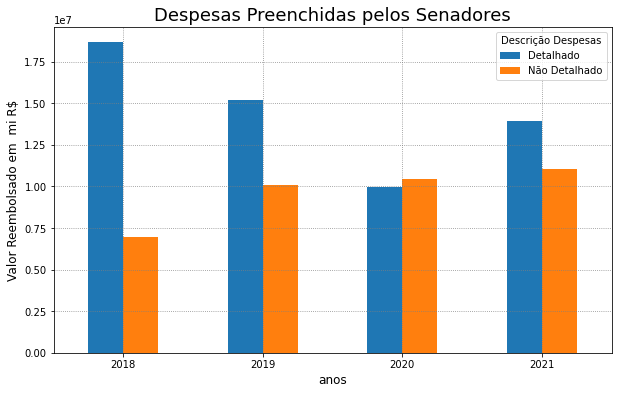

In [54]:
plt.rcParams["figure.figsize"]= (10,6)
fig = desp_preenchimento.plot.bar( rot=0,stacked=False)
plt.legend(title = 'Descrição Despesas')
plt.xlabel('anos',fontsize=12)
plt.ylabel('Valor Reembolsado em  mi R$',fontsize=12)
plt.title('Despesas Preenchidas pelos Senadores',size=18)
plt.grid(color = 'gray',linestyle=':',visible= True)
plt.show();


É um grafico de comparação do valor das despesas que tiveram os seus detalhes preenchidos pelos senadores durante aos anos. <p>



**Criando um dataset para analisar quas tipos de gastos possuem maior valor de reembolso.**

In [80]:
desp_cat = ceaps

desp_cat = desp_cat.drop(columns=(['mes',  'cnpj_cpf', 'fornecedor',
       'documento', 'data', 'detalhamento','cod_documento']), axis=1)
desp_cat.head()

,ano,senador,tipo_despesa,valor_reembolsado,despesa_descricao
0,2021,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",75.29,Detalhado
1,2021,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",1000.00,Detalhado
2,2021,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",6000.00,Detalhado
3,2021,ACIR GURGACZ,Divulgação da atividade parlamentar,1500.00,Detalhado
4,2021,ACIR GURGACZ,Divulgação da atividade parlamentar,6000.00,Detalhado


A descrição do tipo de despesa é muito longa, dificultando a leitura. <p>
Realizei a substituição para uma descrição mais genérica, mas que não altere a sua definição.

In [92]:
ceaps.groupby('tipo_despesa')['valor_reembolsado'].sum()

tipo_despesa
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           17205022.77
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.      3691289.51
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                             23025435.16
Divulgação da atividade parlamentar                                                                                                                                                                12142138.88
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                               

In [169]:
desp_cat.tipo_despesa.replace({'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.':"Aluguel escritório e despesas",
       'Divulgação da atividade parlamentar': "Divulgação da atividade parlamentar",
       'Passagens aéreas, aquáticas e terrestres nacionais': "Passagens nacionais",
       'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes': "Gastos locomoção",
       'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar': "Prestador de Serviço Técnico",
       'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ': "Despesas escritório",
       'Serviços de Segurança Privada': "Seguranca. Privada"},inplace=True)


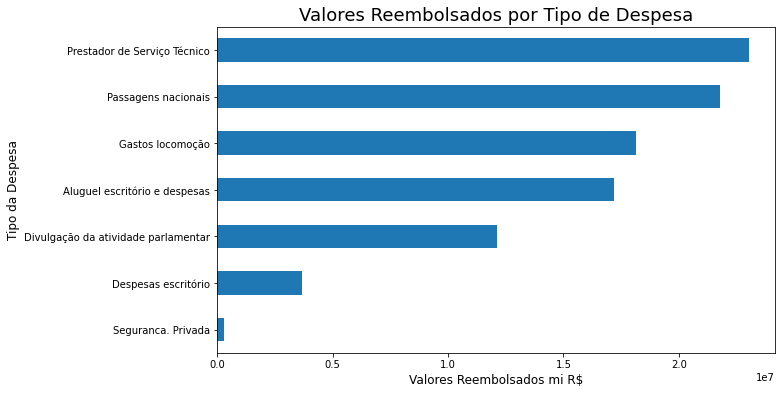

In [168]:
plt.rcParams["figure.figsize"]= (10,6)
desp_cat.groupby('tipo_despesa')['valor_reembolsado'].sum().sort_values(ascending=True).plot.barh();
plt.ylabel('Tipo da Despesa',size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Valores Reembolsados mi R$',size=12)
plt.title('Valores Reembolsados por Tipo de Despesa',fontsize=18);

In [151]:
pvt_desp = desp_cat.pivot_table(values='valor_reembolsado',\
                                columns='despesa_descricao',\
                                margins_name='total' ,margins=True,\
                                index='tipo_despesa',aggfunc='sum')

pvt_desp.sort_values(by='total',axis=0,ascending=True,inplace=True)
 
pvt_desp = pvt_desp.drop(columns='total',axis=1)

pvt_desp = pvt_desp.drop(index='total',axis=0)

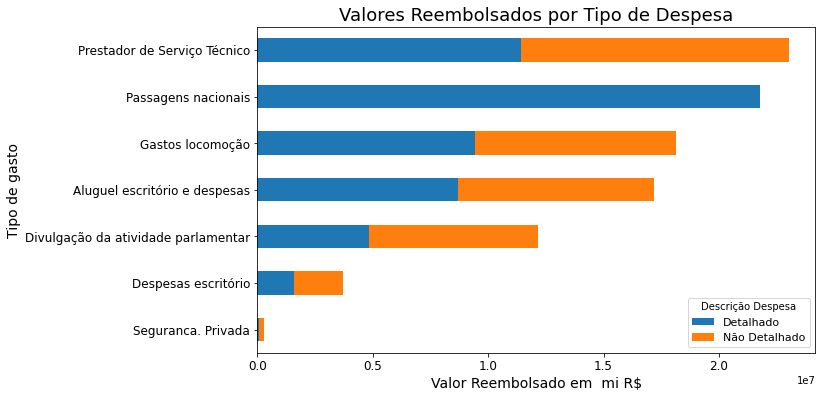

In [179]:
plt.rcParams["figure.figsize"]=(10,6)
pvt_desp.plot.barh(stacked=True)
plt.ylabel('Tipo de gasto',size=14)
plt.yticks(size=12)
plt.xlabel('Valor Reembolsado em  mi R$',size=14)
plt.xticks(size=12)
plt.title('Valores Reembolsados por Tipo de Despesa',size=18)
plt.legend(title='Descrição Despesa',fontsize=11)
plt.show();




**1.  O tipo de despesa que possui maior valor de reembolso é  prestação de serviços técnicos**  . <p>*(Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar)*<p> Sendo maior parte dele não possue informação do detalhamento da despesa.

**2.   Segundo maior e o único que teve todas as suas descrições de despesas preenchidos foi: Passagens nacionais.**<p>*(Passagens aéreas, aquáticas e terrestres nacionais   )*

<p>


**Um detalhe importante:**<p>



A coluna "tipo_despesa", é importante para uma visão macro das despesas que os senadores possuem. No entanto, não preencher a coluna "Detalhamento" impede que seja feito um estudo minucioso deste gasto.

